# Global Energy Emerging Opportunities
## Facundo Espina

## Business Case:

**Client:**  
InvEnergy is a global investment firm focused on the energy sector. As the industry shifts toward sustainability, the company wants to identify new opportunities and manage risks. Their goal is to stay ahead of this transition while maintaining a presence in traditional energy sources.

The firm invests in both conventional energy sectors (like fossil fuels) and renewable ones, such as solar, wind, and biofuels. With increasing regulatory pressures, rapid technological changes, and shifting market dynamics, InvEnergy aims to optimize its portfolio by identifying regions with growth potential and staying aware of risks caused by social, economic, or policy changes.

**Why Analyze the Data?**  
InvEnergy handles vast amounts of data related to energy production, consumption, technology, policies, and socioeconomic trends. To make informed investment decisions, they need to uncover patterns, identify risks, and spot opportunities from this data. 

By analyzing this information, InvEnergy can:
- Understand global energy trends.
- Assess risks and growth potential across regions.
- Optimize investments in renewable and conventional energy sectors.

With over 22,000 records and 129 variables, InvEnergy requires detailed data analysis to gain actionable insights that support smarter investment strategies.

### Business Questions Summary:
We will explore key business questions to help InvEnergy make better investment decisions. Here's a summary of what we aim to accomplish:

1. **Global Energy Overview:** What is the energy consumption mix for different regions, and which regions are most reliant on fossil fuels or renewable energy sources?

2. **Putting Energy and Money into Perspective:** Explore various questions to contextualize energy consumption and its economic impact.

3. **Global Energy Transition:** Which countries are leading the shift from fossil fuels to renewable energy sources?

4. **Investment Risk Assessment:** Which countries show a significant gap between energy consumption and production, signaling potential energy security risks?

5. **Renewable Energy Growth:** Which European countries have seen the most growth in solar and wind energy production over the past five years?

6. **Energy Consumption Trends:** What are the long-term trends in energy consumption for key regions (e.g., Europe, Asia, North America)?

7. **Emerging Markets for Renewable Energy:** Which emerging markets are beginning to adopt renewable energy technologies?



## 1. Exploratory Analysis

**Objective:**
On this section we aim to understand the structure and content of the dataset, identify any data quality issues, and gain initial insights that will inform the subsequent analysis.

1. **Data Overview:**
   - Load and inspect the dataset to understand its structure.
   - Examine the key variables, including country, year, energy consumption, production, and various energy types.
   - Summarize the dataset's dimensions, including the number of records and columns.

2. **Missing Values and Anomalies:**
   - Identify any missing values or anomalies in the dataset.
   - Assess the extent of missing data and decide on appropriate strategies for handling it.

3. **Descriptive Statistics:**
   - Calculate basic descriptive statistics (mean, median, standard deviation) for key variables.
   - Explore the distribution of energy consumption and production across countries and years.

4. **Initial Visualizations:**
   - Create initial plots to visualize the distribution of energy consumption and production by country and year.
   - Use histograms, and correlation heatmaps to explore relationships between different variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas as gpd
import country_converter as coco
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go


warnings.filterwarnings("ignore")

#Since we are handling 'big' numbers we dont care that much about the decimal points
#pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df_og = pd.read_csv('World_Energy_Consumption.csv')
df = df_og.copy()

In [4]:
# Data Overview
print("The world energy dataset contains the following:")
print(f"Number of records: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print('')
print("Number of columns per data type:")
print(df.dtypes.value_counts())
print('')

The world energy dataset contains the following:
Number of records: 22012
Number of columns: 129

Number of columns per data type:
float64    126
object       2
int64        1
Name: count, dtype: int64



we have 129 columns, so instead of inspecting each one, it is better to focus on the business questions and then do the processing for the necessary columns

The dataset provides comprehensive country-level data across various years, focusing on energy production, consumption, and generation across different sources (biofuels, coal, gas, nuclear, oil, renewables, solar, wind, hydro). It tracks changes in energy consumption, per capita metrics, and shares of energy/electricity from different sources. The dataset also includes economic indicators such as GDP, population, and greenhouse gas emissions, allowing for analysis of energy trends, carbon intensity, and the role of renewables and fossil fuels in global energy consumption and production.

In [5]:
print(list(df.columns))

['country', 'year', 'iso_code', 'population', 'gdp', 'biofuel_cons_change_pct', 'biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec', 'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy', 'electricity_demand', 'electricity_generation', 'electricity_share_energy', 'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh', 'fossil_elec_per_capita', 'fossil_electricity', 'fossil_energy_per_capita', 'fossil_fuel_consumption', 'fossil_share_elec', 'fossil_share_energy', 'gas_cons_change_pct', 'gas_cons_change_twh', 'gas_consumption', 'gas_elec_per_capita', '

In [6]:
print(f'The data starts from the year: {df["year"].min()}')
print(f'The data ends at the year: {df["year"].max()}')
print(f'Missing values in year column: {df["year"].isna().sum()}')

The data starts from the year: 1900
The data ends at the year: 2022
Missing values in year column: 0


In [7]:
print('Check missing values BEFORE reducing the timeframe')
print(f'Total amount of missing values: {df.isna().sum().sum()}')
print(f'Total amount of non-missing values: {df.size - df.isna().sum().sum()}')
print(f'Percentage of missing values: {df.isna().sum().sum()/df.size:.2%}')
print(f'Total number of infinite values: {df.isin([np.inf, -np.inf]).sum().sum()}')
print(df.size)

Check missing values BEFORE reducing the timeframe
Total amount of missing values: 1942324
Total amount of non-missing values: 897224
Percentage of missing values: 68.40%
Total number of infinite values: 0
2839548


In [8]:
#Since we only need data from the last 30 years because.....
df = df[df['year'] >= 1990]

In [9]:
print('Check missing values AFTER reducing the timeframe')
print(f'Total amount of missing values: {df.isna().sum().sum()}')
print(f'Total amount of non-missing values: {df.size - df.isna().sum().sum()}')
print(f'Percentage of missing values: {df.isna().sum().sum()/df.size:.2%}')
print(f'Total number of infinite values: {df.isin([np.inf, -np.inf]).sum().sum()}')
print(df.size)

Check missing values AFTER reducing the timeframe
Total amount of missing values: 620937
Total amount of non-missing values: 604692
Percentage of missing values: 50.66%
Total number of infinite values: 0
1225629


In [10]:
len(df['country'].unique())

305

In [11]:
# Creating a dataframe with the detailed calculations of % of missing values.
missing_values = df.isna().sum() / len(df) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

df_missing_values = pd.DataFrame(missing_values, columns=['missing_values'])
pd.set_option('display.max_rows', 129)
df_missing_values.head(20)


missing_values
biofuel_cons_change_pct                83.222819
nuclear_cons_change_pct                82.896537
biofuel_cons_per_capita                79.686349
nuclear_energy_per_capita              79.349542
solar_cons_change_pct                  78.149668
biofuel_cons_change_twh                76.844543
biofuel_share_energy                   76.781391
nuclear_share_energy                   76.728765
biofuel_consumption                    76.234081
nuclear_cons_change_twh                75.907799
wind_cons_change_pct                   75.813072
nuclear_consumption                    75.634144
other_renewables_cons_change_pct       72.729186
fossil_energy_per_capita               71.066204
low_carbon_energy_per_capita           70.718872
renewables_energy_per_capita           70.718872
hydro_energy_per_capita                70.718872
gas_energy_per_capita                  69.992632
coal_cons_per_capita                   69.813704
solar_energy_per_capita                68.919061

In [12]:
# Group by 'country' and calculate the percentage of missing values
country_missing_values = df.groupby('country').apply(lambda x: x.isna().sum().sum() / x.size * 100)

# Sort the countries by the percentage of missing values
most_missing_countries = country_missing_values.sort_values(ascending=False)
least_missing_countries = country_missing_values.sort_values(ascending=True)

# Display the countries with most and least missing values
print("Countries with the most missing values:")
print(most_missing_countries.head(20))

print("\nCountries with the least missing values:")
print(least_missing_countries.head(20))


Countries with the most missing values:
country
U.S. Territories (EIA)                          96.899225
U.S. Pacific Islands (EIA)                      96.148256
Wake Island (EIA)                               96.148256
OECD - Europe (EIA)                             96.124031
OPEC - Africa (EIA)                             96.124031
IEO - Middle East (EIA)                         96.124031
IEO OECD - Europe (EIA)                         96.124031
Persian Gulf (EIA)                              96.124031
Other Non-OECD - Europe and Eurasia (EIA)       96.124031
Other Non-OECD - Asia (EIA)                     96.124031
Other Non-OECD - America (EIA)                  96.124031
Mexico, Chile, and other OECD Americas (EIA)    96.124031
OPEC - South America (EIA)                      96.124031
OPEC (EIA)                                      96.124031
Eurasia (EIA)                                   96.124031
OPEC (EI)                                       96.124031
OECD - North America (EI

In [13]:
# Group by 'country' and calculate the total number of missing values per country
missing_per_country = df.groupby('country').apply(lambda x: x.isna().sum().sum())

# Sort by missing values in descending order
sorted_missing_per_country = missing_per_country.sort_values(ascending=False)

# Calculate total missing values in the dataset
total_missing = df.isna().sum().sum()

# Get the sum of missing values for the top 10, 20, and 30 countries
missing_top_10 = sorted_missing_per_country.head(10).sum()
missing_top_20 = sorted_missing_per_country.head(20).sum()
missing_top_30 = sorted_missing_per_country.head(30).sum()

# Calculate the percentage of total missing values concentrated in the top 10, 20, and 30 countries
perc_top_10 = (missing_top_10 / total_missing) * 100
perc_top_20 = (missing_top_20 / total_missing) * 100
perc_top_30 = (missing_top_30 / total_missing) * 100

print(f"Percentage of total missing values in top 10 countries: {perc_top_10:.2f}%")
print(f"Percentage of total missing values in top 20 countries: {perc_top_20:.2f}%")
print(f"Percentage of total missing values in top 30 countries: {perc_top_30:.2f}%")


Percentage of total missing values in top 10 countries: 6.43%
Percentage of total missing values in top 20 countries: 12.82%
Percentage of total missing values in top 30 countries: 19.20%


In [14]:
# handle empty or missing values
df['iso_code'] = df['iso_code'].fillna('nonapplicable')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(method='ffill').fillna(method='bfill')
df.isna().sum().sum()

0

In [15]:
columns = ['population', 'gdp', 'biofuel_consumption', 'coal_consumption', 'renewables_consumption', 'fossil_fuel_consumption', 
           'solar_consumption', 'wind_consumption', 'electricity_generation', 'greenhouse_gas_emissions']

stats = pd.DataFrame({
    'mean': df[columns].mean(),
    'median': df[columns].median(),
    'std': df[columns].std()})

stats_transposed = stats.T
stats_transposed = stats_transposed.applymap(lambda x: f'{x:,.2f}')
stats_transposed

population                   gdp biofuel_consumption  \
mean    182,761,616.50    978,125,245,855.71               88.29   
median    6,600,736.00    142,391,017,472.00                3.29   
std     739,560,493.86  5,023,345,952,898.60              208.86   

       coal_consumption renewables_consumption fossil_fuel_consumption  \
mean           2,507.52               1,396.35                9,054.47   
median            69.79                  92.75                  836.13   
std            7,804.79               3,658.77               22,004.85   

       solar_consumption wind_consumption electricity_generation  \
mean              183.11           307.26               1,356.54   
median              3.77             7.47                  26.57   
std               545.07           875.97               3,684.90   

       greenhouse_gas_emissions  
mean                     449.71  
median                     4.29  
std                    1,422.36

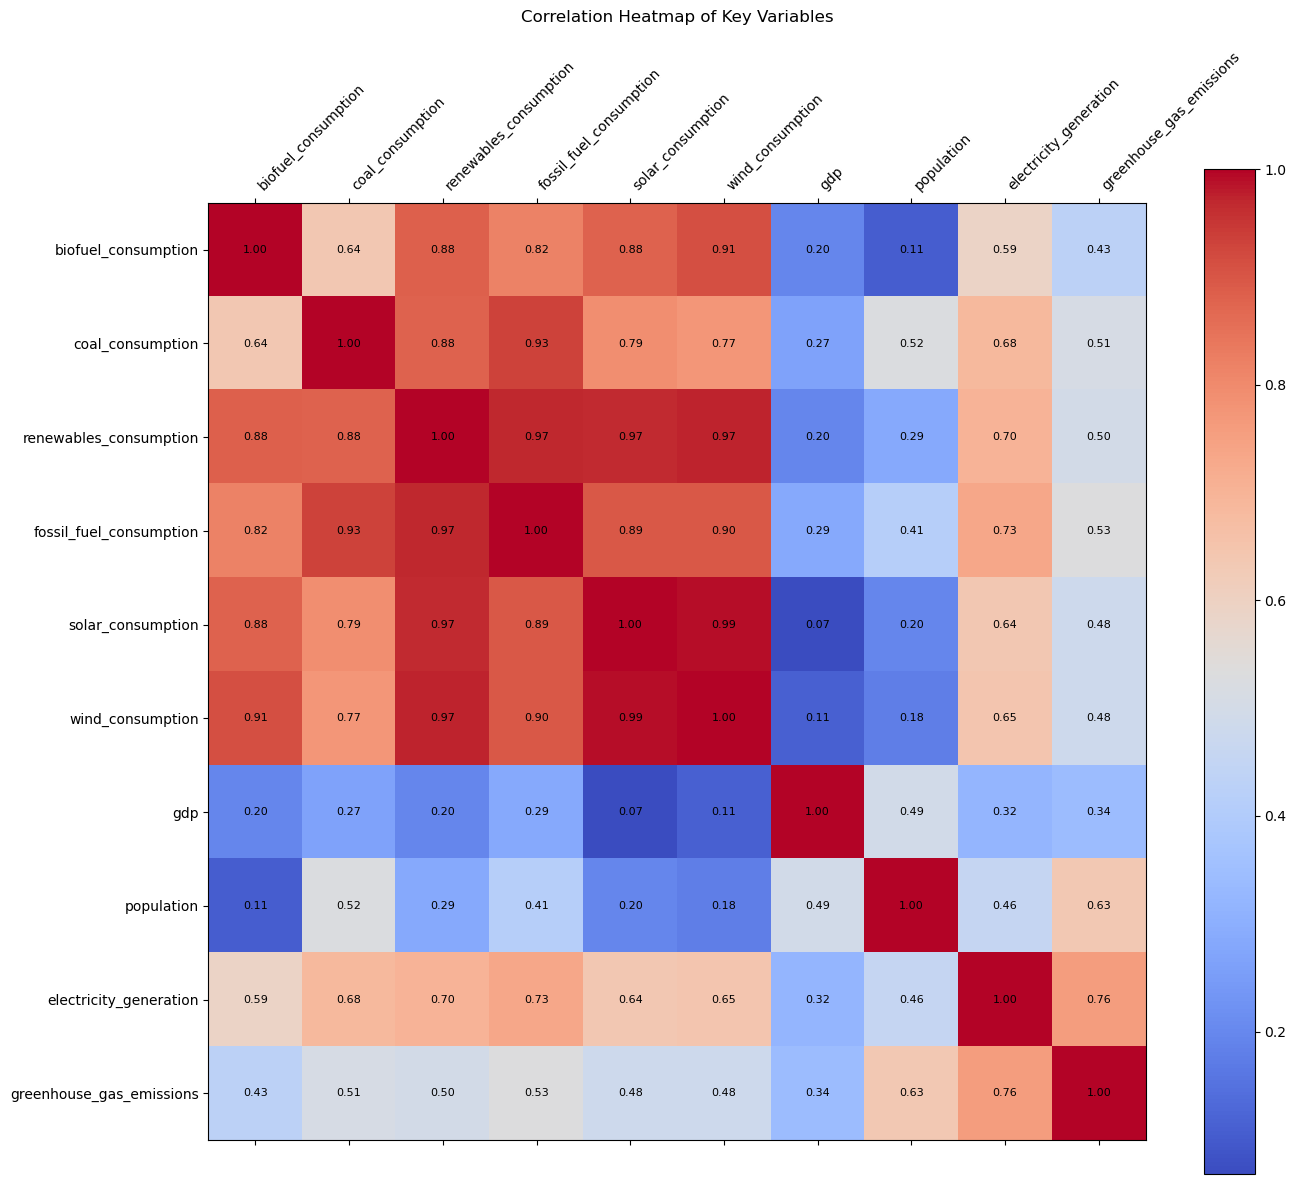

In [16]:
corr_columns = [
    'biofuel_consumption', 'coal_consumption', 'renewables_consumption', 'fossil_fuel_consumption',
    'solar_consumption', 'wind_consumption', 'gdp', 'population', 'electricity_generation', 'greenhouse_gas_emissions'
]

corr_matrix = df[corr_columns].corr()
fig, ax = plt.subplots(figsize=(14, 12))

cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)


ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='left', fontsize=10)
ax.set_yticklabels(corr_matrix.columns, fontsize=10)


for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)

plt.title('Correlation Heatmap of Key Variables', pad=20, fontsize=12)
plt.tight_layout()
plt.show()


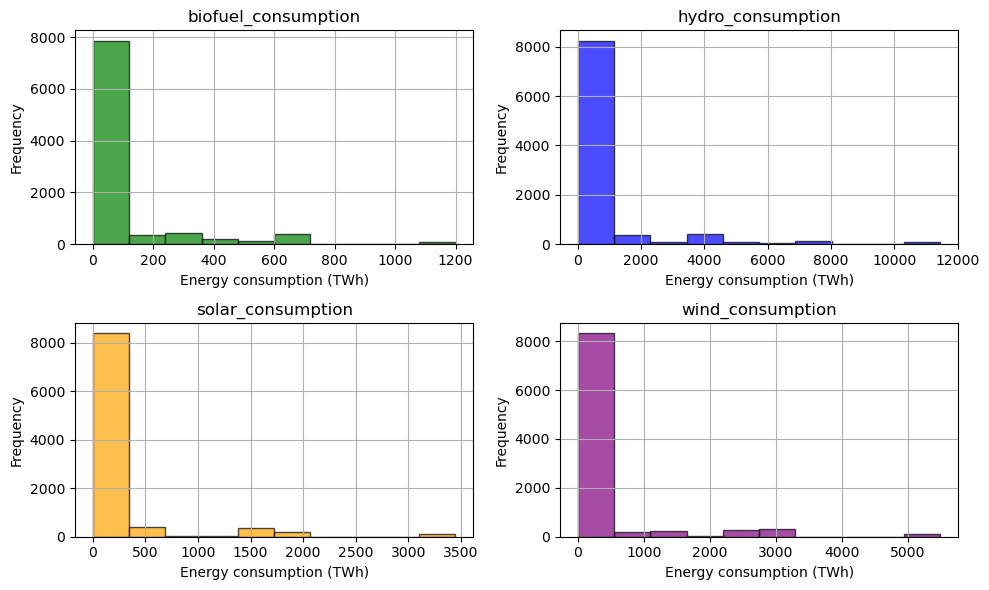

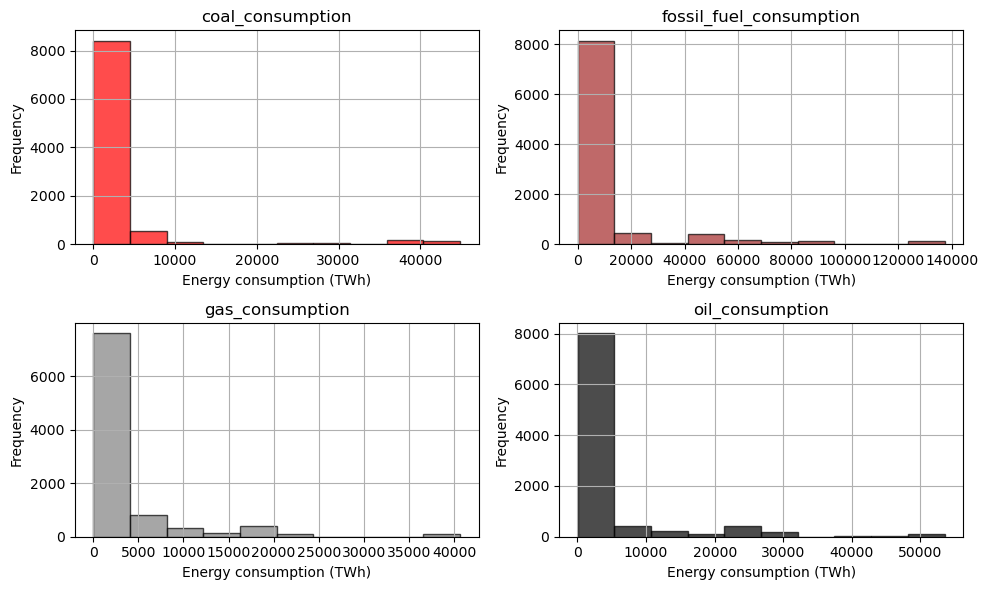

In [17]:
# Preparation
renewable_columns = ['biofuel_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption']
fossil_columns = ['coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'oil_consumption']

renewable_colors = ['green', 'blue', 'orange', 'purple']
fossil_colors = ['red', 'brown', 'gray', 'black']


# Visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
for ax, column, color in zip(axes.ravel(), renewable_columns, renewable_colors):
    ax.hist(df[column].dropna(), bins=10, color=color, edgecolor='black', alpha=0.7)
    ax.set_title(f'{column}')
    ax.set_xlabel('Energy consumption (TWh)')
    ax.set_ylabel('Frequency')
    ax.grid(True)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(10, 6))
for ax, column, color in zip(axes.ravel(), fossil_columns, fossil_colors):
    ax.hist(df[column].dropna(), bins=10, color=color, edgecolor='black', alpha=0.7)
    ax.set_title(f'{column}')
    ax.set_xlabel('Energy consumption (TWh)')
    ax.set_ylabel('Frequency')
    ax.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# We create this dataframe which will be used multiple times in the future
filtered_df = df[df['iso_code'].notnull() & (df['iso_code'] != 'nonapplicable') & (df['iso_code'] != 'ANT')]
filtered_df['region'] = coco.convert(names=filtered_df['iso_code'], to='continent', not_found=None)
df.loc[filtered_df.index, 'region'] = filtered_df['region']

## 2. Explanatory Analysis

In [19]:
# Preparation
df_2022 = df[df['year'] == 2022]
columns_to_include = ['iso_code', 'country', 'population', 'gdp', 'primary_energy_consumption', 'energy_per_capita']
df_2022 = df_2022[columns_to_include]


# Visualization
fig = px.choropleth(
    df,
    locations='iso_code',
    color='primary_energy_consumption',
    hover_name='country',
    hover_data={
        'population': ':,.0f',
        'gdp': ':,.0f',
        'primary_energy_consumption': ':,.2f',
        'energy_per_capita': ':,.2f',
    },
    color_continuous_scale='magma',
    projection='natural earth',
    title='World Energy Data for 2022',
    range_color=(0, 30000)
)

fig.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),
    geo=dict(
        landcolor='lightgray',
        projection_scale=1.2,
    ),
    coloraxis_colorbar=dict(
        title="Energy Consumption (TWh)",
    ),
    paper_bgcolor='rgba(0, 0, 0, 0)',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    width=1000,
    height=600,
)
fig.show()

## Question 2: Putting Energy and Money into Perspective

**Importance:** Understanding energy production and its various dimensions is critical for effective communication and informed decision-making. By translating abstract energy figures into relatable, practical examples, you make it easier for stakeholders to grasp the scale and implications of energy consumption and production. This approach also provides a foundation for interpreting energy statistics with more impact, leading to more informed discussions around energy policy, sustainability, and economic growth.

#### 2.1 How do different economies compare in terms of TWh consumption?
   2022 Energy consumption in TWh
   - **China**:   **44,275 TWh**
   - **USA**:     **26,641 TWh**
   - **India**:   **10,123 TWh**
   - **Brazil**:  **3,724  TWh**
   - **Germany**: **3,416  TWh**
   - **Mexico**:  **2,423  TWh**
   - **France**:  **2,329  TWh**

<br>

#### 2.2 What is 1 TWh, 10 TWh, 100 TWh and 1000 TWh in real-world examples?

##### 1 TWh
- **Number of smartphones charged:** 1 TWh can charge around **12.5 billion** smartphones fully. 
- **Power a city:** 1 TWh could power **93,000 American homes** for an entire year.
- **Distance driven in electric cars:** 1 TWh could power an EV car to drive a total of **4 billion miles**, which is enough to circle the Earth about **160,000 times**.
- **Water boiling:** 1 TWh could boil **43 billion** cups of water.

##### 10 TWh
- **Movie streaming:** Watching Netflix in HD for about **3.4 billion hours**, which is like streaming the trilogy of *Lord of the Rings*  **330 million times**.
- **Lighting the Eiffel Tower:** You could light up the Eiffel Tower for **over 3,500 years** continuously with 10 TWh of energy.
- **Air travel:** 10 TWh is the energy used by **10 million flights**, which could fly the entire U.S. population from New York to Tokyo and back.

##### 100 TWh
- **Bitcoin mining:** This is the total annual energy consumption of the **entire Bitcoin network**.
- **Powering NYC:** You could power **New York City** for about **2.5 years** with 100 TWh.
- **Car manufacturing:**  The energy required to manufacture over **8 million cars** this is what Volkswagen group annual production.

##### 1,000 TWh
- **Global electricity consumption:** This is nearly **4% of the world’s annual electricity usage**.
- **Space heating:** You could heat **10 million homes** for over **10 years** with 1,000 TWh.
- **Lightning bolts:** If you could harness all the energy from a lightning bolt, you’d need about **3.6 trillion bolts** to reach 1,000 TWh.
- **Sunlight on Earth:** 1,000 TWh is equivalent to the energy the Earth receives from the sun in just **21 minutes**!

<br>

#### 2.3 What is the amount of coal needed for generating 1/10/100/10000 TWh of energy?

##### 1 TWh: 400,000 metric tons of coal
- **Elephants:** 400,000 tons of coal weighs as much as **57,000 adult elephants**. That’s enough elephants to form a line of 400 km.

##### 10 TWh: 4 million metric tons of coal
- **Pyramids of Giza:** 4 million metric tons of coal weighs almost the same as the **Great Pyramid of Giza**.

##### 100 TWh: 40 million metric tons of coal
- **Golden Gate Bridge:** If you built **90 Golden Gate Bridges**, the total mass would equal 40 million tons of coal.

##### 1,000 TWh: 4 billion metric tons of coal
- **Human Population:** If each person on Earth weighed around 60 kg, you’d need the combined mass of **about 66 billion people** (over 8 times the current human population) to match the weight of 4 billion tons of coal.

<br>

#### 2.4 How much oil (in barrels, swimming pools, or lakes) is equivalent to 1 TWh of energy?

##### 1 TWh: 588,235 barrels of oil
- **Olympics:** 588,235 barrels of oil could fill **37 Olympic-sized swimming pools**

##### 10 TWh: 5.88 million barrels of oil
- **Berlin TV tower:** you could fill the observation sphere of the **Berlin TV Tower about 285 times**.

##### 100 TWh: 58.82 million barrels of oil
- **Empire State Buildings:** If stacked in barrels, the amount of oil would be taller than **117,000 Empire State Buildings**.

##### 1,000 TWh: 588.23 million barrels of oil
- **To the Moon in barrels:** If stacked end to end, these barrels could reach the moon **517,640 kilometers**. 

<br>

#### 2.5 What is the monetary value of 1, 10, 100, 1000 TWh across different energy sources?
| Energy Source   | 1 TWh  | 10 TWh  | 100 TWh | 1,000 TWh |
|-----------------|--------|---------|---------|-----------|
| **Coal**        | 60M    | 600M    | 6B      | 60B       |
| **Natural Gas** | 50M    | 500M    | 5B      | 50B       |
| **Nuclear**     | 100M   | 1B      | 10B     | 100B      |
| **Onshore Wind**| 40M    | 400M    | 4B      | 40B       |
| **Solar PV**    | 35M    | 350M    | 3.5B    | 35B       |
| **Hydropower**  | 50M    | 500M    | 5B      | 50B       |

<br>

#### 2.6 How much money would it take to supply 1% of Germany’s annual energy needs?
- To supply **1% of Germany's energy** consumption: **$1,366,514,800**
   
<br>

#### 2.7 How much money would be required to supply 0.1% of the USA’s energy needs?
- To supply **0.1% of USA's energy** consumption: **$1,065,670,840**

In [21]:
#1. How do different economies compare in terms of TWh consumption?
#   - USA, Germany, China, Mexico, France, Brazil, and India
usa_consumption = df[(df['year']== 2022) & (df['country']== 'United States')]['primary_energy_consumption'].values[0]
germany_consumption = df[(df['year']== 2022) & (df['country']== 'Germany')]['primary_energy_consumption'].values[0]
china_consumption = df[(df['year']== 2022) & (df['country']== 'China')]['primary_energy_consumption'].values[0]
mexico_consumption = df[(df['year']== 2022) & (df['country']== 'Mexico')]['primary_energy_consumption'].values[0]
france_consumption = df[(df['year']== 2022) & (df['country']== 'France')]['primary_energy_consumption'].values[0]
brazil_consumption = df[(df['year']== 2022) & (df['country']== 'Brazil')]['primary_energy_consumption'].values[0]
india_consumption = df[(df['year']== 2022) & (df['country']== 'India')]['primary_energy_consumption'].values[0]



print('2022 Energy consumption in TWh')
print(f'China:   {china_consumption} TWh')
print(f'USA:     {usa_consumption} TWh')
print(f'India:   {india_consumption} TWh')
print(f'Brazil:  {brazil_consumption} TWh')
print(f'Germany: {germany_consumption} TWh')
print(f'Mexico:  {mexico_consumption} TWh')
print(f'France:  {france_consumption} TWh')
print('')
print('')


#6. How much money would it take to supply 1% of Germany’s annual energy needs?
ger_1_pct = (germany_consumption * 0.01) * 40000000
print(f"To supply 1% of Germany's energy consumption: ${ger_1_pct}")


#7. How much money would be required to supply 0.1% of the USA’s energy needs?
usa_01_pct = (usa_consumption * 0.001) * 40000000
print(f"To supply 0.1% of USA's energy consumption: ${usa_01_pct}")

2022 Energy consumption in TWh
China:   44275.914 TWh
USA:     26641.771 TWh
India:   10123.443 TWh
Brazil:  3724.87 TWh
Germany: 3416.287 TWh
Mexico:  2423.75 TWh
France:  2329.906 TWh


To supply 1% of Germany's energy consumption: $1366514800.0
To supply 0.1% of USA's energy consumption: $1065670840.0000001


## Question 3: Global Energy Transition
   - **Question:** Which countries are leading the transition from fossil fuels to renewable energy sources?
    
   - **Importance:** Identifying these leaders helps the firm focus on regions with strong growth potential in renewables, aligning their investments with global sustainability trends.

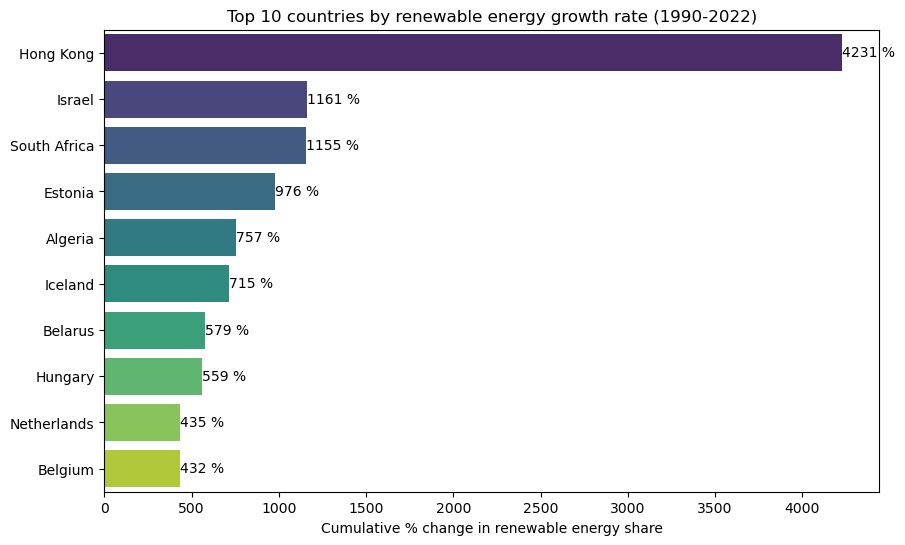

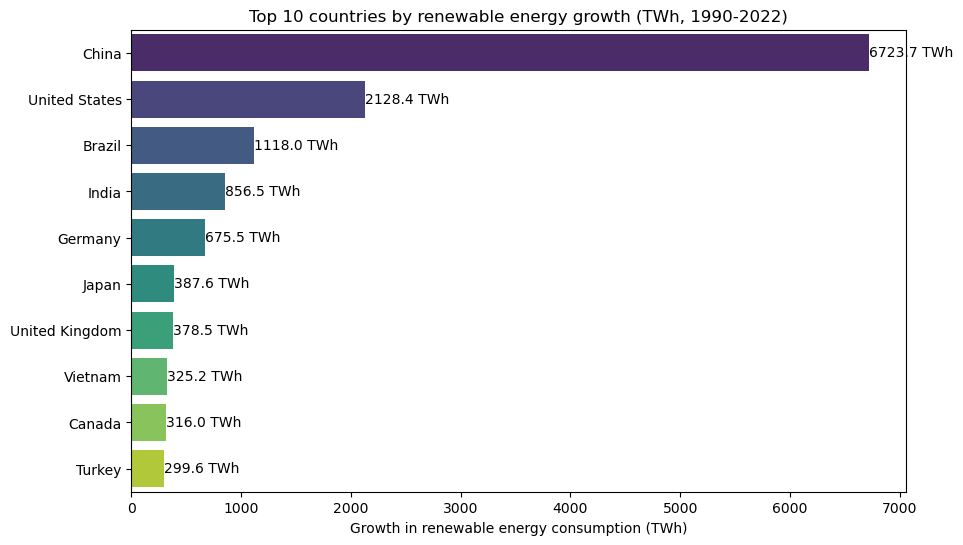

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


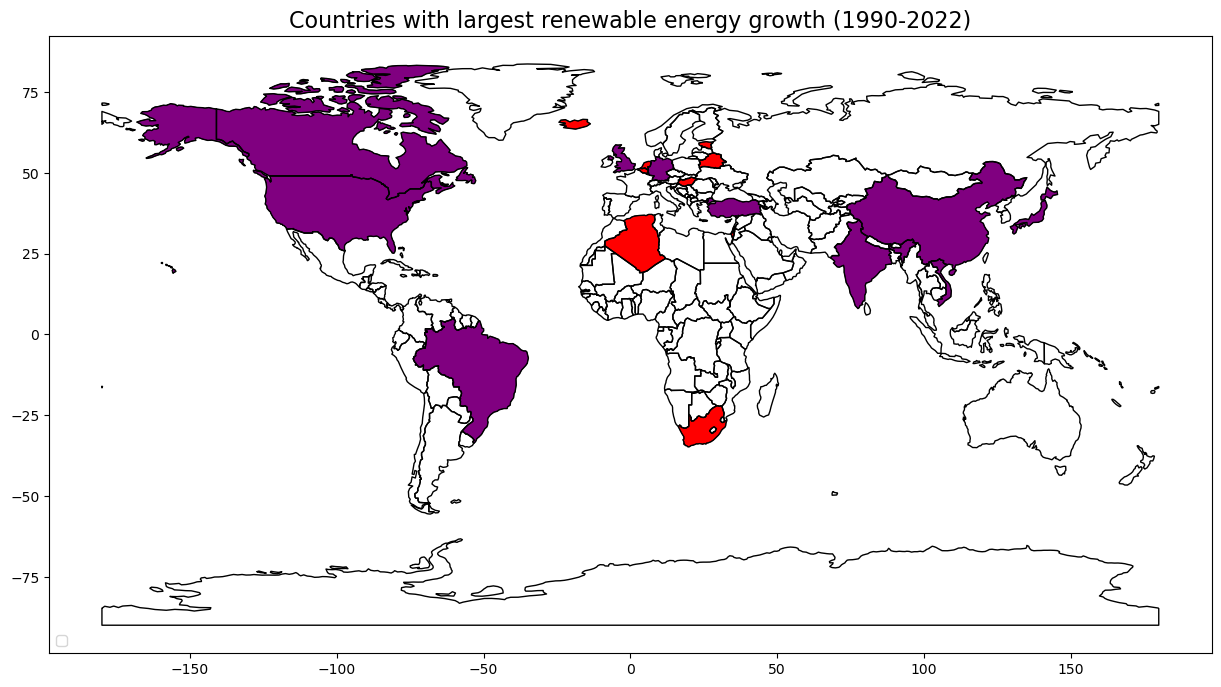

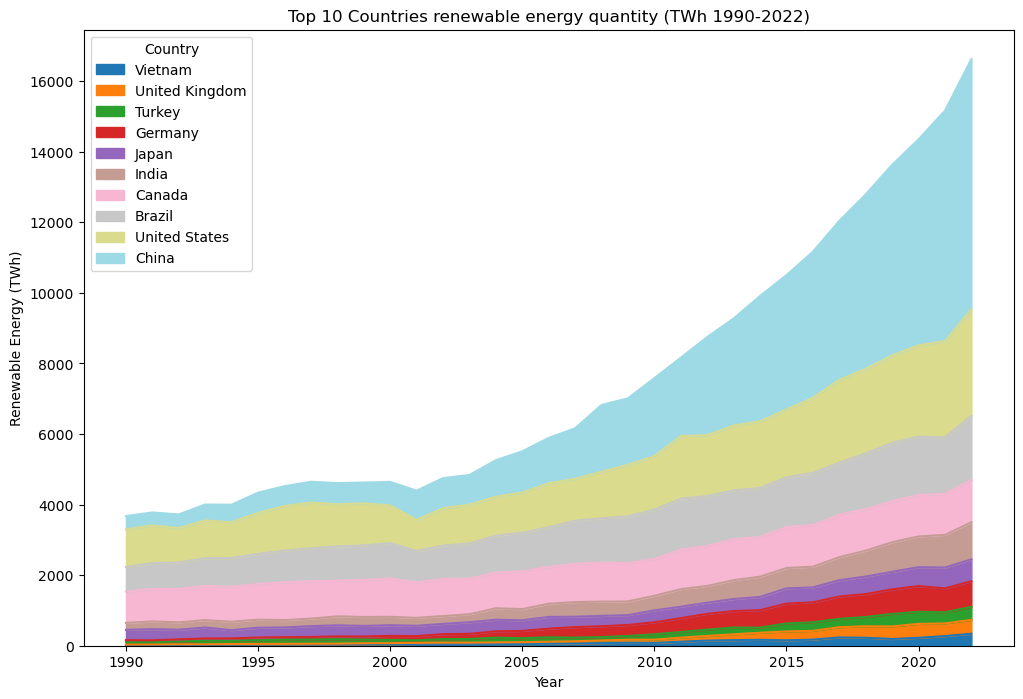

In [22]:
# Preparation
df['renewables_energy_pct'] = df.groupby('country')['renewables_share_energy'].pct_change() * 100
df['renewables_energy_pct'].replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(method='ffill').fillna(method='bfill')
df_pct = df.groupby('country')['renewables_energy_pct'].sum().reset_index()
df_pct = df_pct.nlargest(10, 'renewables_energy_pct')

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='renewables_energy_pct', y='country', data=df_pct, palette='viridis')
plt.title('Top 10 countries by renewable energy growth rate (1990-2022)')
plt.xlabel('Cumulative % change in renewable energy share')
plt.ylabel('')

# Add values on top of bars
for index, value in enumerate(df_pct['renewables_energy_pct']):
    ax.text(value, index, f'{value:.0f} %', va='center')

plt.show()

#################################################################

# Preparation
filtered_df['renewables_consumption_diff'] = filtered_df.groupby('country')['renewables_consumption'].transform(lambda x: x.max() - x.min())
df_quantity = filtered_df.groupby('country')['renewables_consumption_diff'].max().reset_index()
df_quantity = df_quantity.nlargest(10, 'renewables_consumption_diff')


# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='renewables_consumption_diff', y='country', data=df_quantity, palette='viridis')
plt.title('Top 10 countries by renewable energy growth (TWh, 1990-2022)')
plt.xlabel('Growth in renewable energy consumption (TWh)')
plt.ylabel('')

# Add values on top of bars
for index, value in enumerate(df_quantity['renewables_consumption_diff']):
    ax.text(value, index, f'{value:.1f} TWh', va='center')

plt.show()


#################################################################
# cambiar scope o eliminar, make it interactive and hover over to display information
# This is necessary to bring the country back
df_unique = df[['country', 'iso_code']].drop_duplicates()
df_pct = df_pct.merge(df_unique, on='country', how='left')
df_quantity = df_quantity.merge(df_unique, on='country', how='left')

# Preparation
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_pct = world.merge(df_pct[['iso_code', 'renewables_energy_pct']], left_on='iso_a3', right_on='iso_code', how='left')
world_quantity = world.merge(df_quantity[['iso_code', 'renewables_consumption_diff']], left_on='iso_a3', right_on='iso_code', how='left')

world.loc[world_pct['renewables_energy_pct'].notna(), 'highlight'] = 'Percentage'
world.loc[world_quantity['renewables_consumption_diff'].notna(), 'highlight'] = 'Amount'


# Visualization
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='black')
world[world['highlight'] == 'Percentage'].plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, label='Highest Growth by Percentage')
world[world['highlight'] == 'Amount'].plot(ax=ax, color='purple', edgecolor='black', linewidth=0.5, label='Highest Growth by Amount')

plt.title('Countries with largest renewable energy growth (1990-2022)', fontsize=16)
plt.legend(loc='lower left')
plt.show()


#################################################################

# Preparation
top_countries_list = df_quantity['country'].tolist()
df_top_countries = df[df['country'].isin(top_countries_list)]

df_area = df_top_countries.pivot_table(index='year', columns='country', values='renewables_consumption', aggfunc='sum')
total_consumption = df_area.sum().sort_values(ascending=True)
df_area = df_area[total_consumption.index]


# Visualization
df_area.plot.area(figsize=(12, 8), colormap='tab20')
plt.title('Top 10 Countries renewable energy quantity (TWh 1990-2022)')
plt.xlabel('Year')
plt.ylabel('Renewable Energy (TWh)')
plt.legend(title='Country')
plt.show()



### Conclusions 3:

**Countries leading in renewable energy share growth (1990–2022)**: Hong Kong shows exceptional renewable energy growth at 4,231%, with Israel and South Africa also making substantial progress (~1150%). These countries likely started from a low baseline and are rapidly increasing renewable adoption. Estonia, Algeria, and Iceland have also made significant strides in integrating renewables, demonstrating regional commitment to the energy transition.

High-growth countries like Hong Kong, Israel, and South Africa are ripe for early-stage renewable infrastructure development, providing opportunities to build foundational renewable capacity.

**Top countries by absolute renewable energy growth (TWh)**: China leads globally with 6723 TWh, followed by the United States and Brazil, indicating vast investments in renewable infrastructure. India, Germany, and Japan also showcase substantial growth, positioning them as key players in large-scale renewable projects. Mature markets like China and the U.S. are ideal for scaling and expanding existing renewable capacity. These countries have strong governmental support for renewables and growing demand for innovative solutions like energy storage and grid modernization.

**Renewable energy consumption over time**: The area chart showing renewable energy consumption over time highlights that China, United States, and Brazil have seen massive and steady growth since the early 2000s. Have steadily increased their renewable energy consumption, indicating both a growing demand and government-backed efforts to transition away from fossil fuels. These markets are vital for large-scale renewable investments. Emerging economies such as India, Vietnam, and Turkey show notable growth in renewable energy capacity, suggesting these regions are quickly catching up with mature markets.


## Question 4: Investment Risk Assessment
   - **Question:** Which countries show a significant gap between energy consumption and production, indicating potential energy security risks?
    
   - **Importance:** Understanding these risks can help the firm avoid investments in regions where energy shortages could impact economic stability.

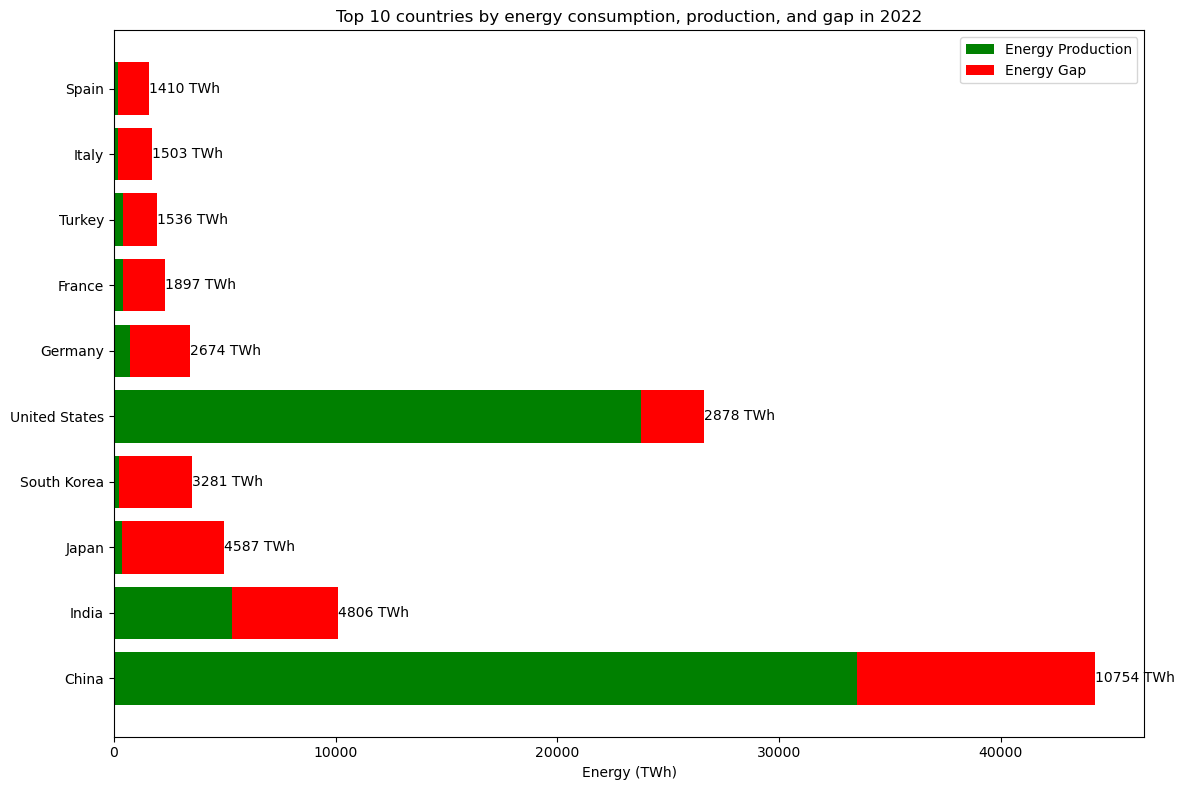

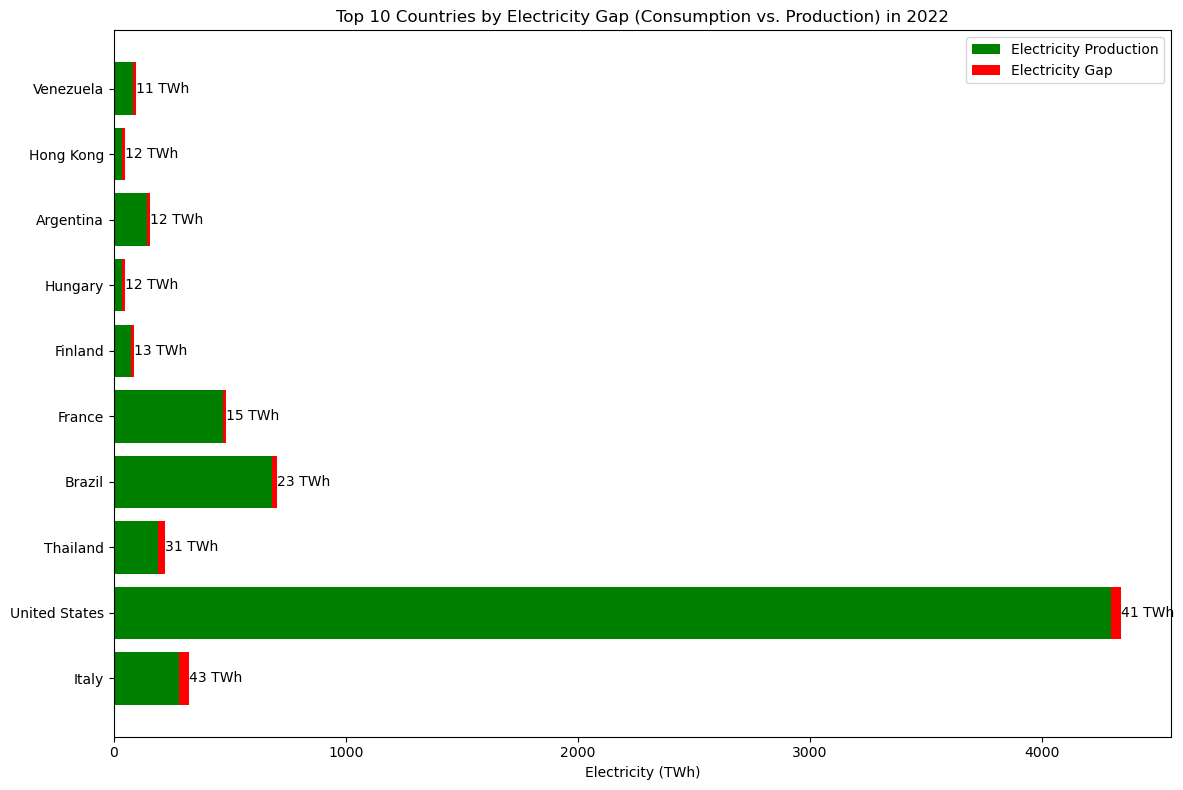

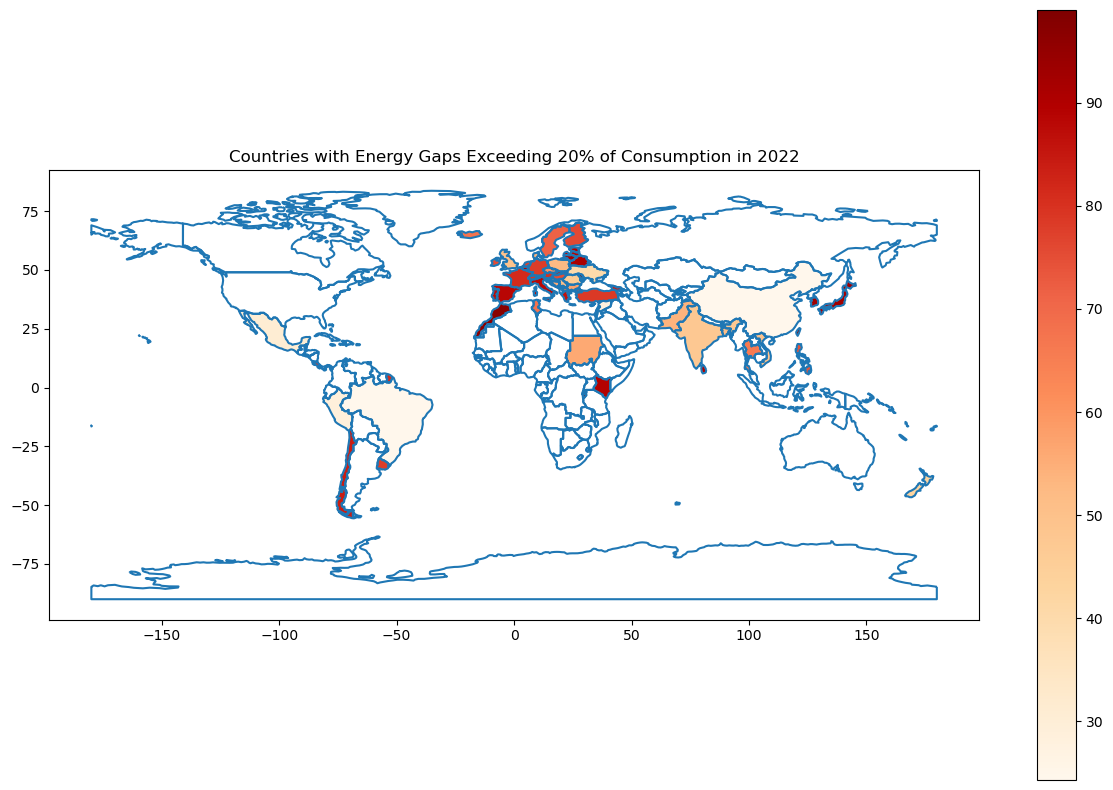

In [23]:
# Preparation
filtered_df['energy_production'] = (
    df['coal_production'] +
    df['oil_production'] +
    df['gas_production'] +
    df['solar_electricity'] +
    df['wind_electricity'] +
    df['hydro_electricity'] +
    df['biofuel_electricity'] +
    df['other_renewable_electricity'] +
    df['nuclear_electricity']
)

df_latest_year = filtered_df[filtered_df['year'] == 2022]
df_latest_year['energy_gap'] = df_latest_year['primary_energy_consumption'] - df_latest_year['energy_production']
df_risk = df_latest_year.nlargest(10, 'energy_gap')

countries = df_risk['country']
consumption = df_risk['primary_energy_consumption']
production = df_risk['energy_production']
gap = df_risk['energy_gap']


# Visualization
plt.figure(figsize=(12, 8))
plt.barh(countries, production, color='green', label='Energy Production')
plt.barh(countries, consumption - production, left=production, color='red', label='Energy Gap')
plt.xlabel('Energy (TWh)')
plt.title(f'Top 10 countries by energy consumption, production, and gap in 2022')
plt.legend()

for i in range(len(countries)):
    plt.text(consumption.iloc[i], i, f'{gap.iloc[i]:.0f} TWh', va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#################################################################

# Preparation
df_latest_year['electricity_gap'] = df_latest_year['electricity_demand'] - df_latest_year['electricity_generation']
df_risk_electricity = df_latest_year.nlargest(10, 'electricity_gap')

countries = df_risk_electricity['country']
consumption = df_risk_electricity['electricity_demand']
production = df_risk_electricity['electricity_generation']
gap = df_risk_electricity['electricity_gap']


# Visualization
plt.figure(figsize=(12, 8))
plt.barh(countries, production, color='green', label='Electricity Production')
plt.barh(countries, consumption - production, left=production, color='red', label='Electricity Gap')
plt.xlabel('Electricity (TWh)')
plt.title(f'Top 10 Countries by Electricity Gap (Consumption vs. Production) in 2022')
plt.legend()

for i in range(len(countries)):
    plt.text(consumption.iloc[i], i, f'{gap.iloc[i]:.0f} TWh', va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

#################################################################

# Preparation
df_latest_year['energy_gap_pct'] = (df_latest_year['energy_gap'] / df_latest_year['primary_energy_consumption']) * 100
risky_countries = df_latest_year[df_latest_year['energy_gap_pct'] > 20]
world_risk = world.merge(risky_countries, left_on='iso_a3', right_on='iso_code', how='left')

# Visualization
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_risk.boundary.plot(ax=ax)
world_risk.plot(column='energy_gap_pct', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title(f'Countries with Energy Gaps Exceeding 20% of Consumption in 2022')
plt.show()

### Conclusions 4:

**High-Risk Regions**: Countries like China, India, South Korea, and Japan exhibit massive energy gaps, driven by high consumption and insufficient domestic production. These gaps indicate energy security risks but also high potential for investments in renewable energy, energy storage, and grid modernization to close the gap. Italy and Brazil also show electricity production shortfalls, making them key regions for electricity infrastructure improvements.

**Investment Opportunities**: There is an opportunity to invest in regions with significant energy gaps to support the development of renewable energy projects (solar, wind, hydro) and energy storage systems. These investments would help countries reduce their dependence on energy imports and increase self-sufficiency. Energy efficiency programs could be introduced to manage consumption more effectively, helping countries reduce the strain on their existing energy systems.

**Target Regions**: In Europe, countries like Germany, France, and Italy show both absolute and relative energy gaps, indicating that their current energy systems are under strain. These markets may benefit from smart grid technologies, energy efficiency improvements, and renewable energy investments. In Asia, the large gaps in China, India, and South Korea make these countries primary targets for renewable energy investments and energy storage solutions.

By focusing on regions with the most significant energy shortfalls, the firm can make strategic investments in renewables and energy infrastructure that not only offer high returns but also contribute to energy security and sustainability.

## Question 5: Renewable Energy Growth
   - **Question:** Which european countries have shown the most significant growth in solar and wind energy production in the past five years?
    
   - **Importance:** Focusing on these countries allows the firm to invest in markets where renewables are expanding rapidly, potentially leading to higher returns.

In [24]:
# Preparation
df_eur = filtered_df[filtered_df['region'] == 'Europe']
df_eur_5y = df_eur[df_eur['year'] >= 2022 - 5]
df_eur_5y_solar = (df_eur_5y.sort_values(by='solar_cons_change_pct', ascending=False).groupby('year').head(10))
df_eur_5y_wind = (df_eur_5y.sort_values(by='wind_cons_change_pct', ascending=False).groupby('year').head(10))

df_eur_5y_solar = df_eur_5y_solar.sort_values(by='year')
df_eur_5y_wind = df_eur_5y_wind.sort_values(by='year')


# Visualization
fig_solar = px.bar(
    df_eur_5y_solar,
    x='country',
    y='solar_cons_change_pct',
    color='solar_cons_change_pct',
    hover_name='country',
    animation_frame='year',
    animation_group='country',
    labels={'year': 'Year', 'solar_cons_change_pct': 'Growth (%)'},
    title="Top 10 european countries - solar energy growth in the last 5 years",
    color_continuous_scale='Viridis',
)

fig_solar.update_layout(
    xaxis_title='Country',
    yaxis_title='Energy growth (%)',
    coloraxis_colorbar=dict(title="Growth (%)"),
    width=1200,
    height=700
)

fig_solar.show()

#########################################################

# Visualization
fig_wind = px.bar(
    df_eur_5y_wind,
    x='country',
    y='wind_cons_change_pct',
    color='wind_cons_change_pct',
    hover_name='country',
    animation_frame='year',
    animation_group='country',
    labels={'year': 'Year', 'wind_cons_change_pct': 'Growth (%)'},
    title="Top 10 european countries - wind energy growth in the last 5 years",
    color_continuous_scale='Viridis',
)

fig_wind.update_layout(
    xaxis_title='Country',
    yaxis_title='Energy growth (%)',
    coloraxis_colorbar=dict(title="Growth (%)"),
    width=1200,
    height=700
)

fig_wind.show()

#########################################################

# Visualization
fig_map = px.choropleth(
    df_eur_5y_solar,
    locations='iso_code',
    color='solar_cons_change_pct',
    hover_name='country',
    animation_frame='year',
    title='Top 10 Countries by energy growth in the past 5 years ',
    color_continuous_scale='Plasma',
    labels={'solar_cons_change_pct': 'Solar energy growth (%)'},
)

fig_map.update_geos(
    projection_type="natural earth",
    center=dict(lon=10, lat=50),  #center on Europe
    projection_scale=4.0,
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    showocean=True,
    oceancolor="lightblue",
)

fig_map.update_layout(
    width=1200,
    height=700,
)

fig_map.show()


### Conclusions 5:

**Solar Energy Growth**:
Countries such as Belarus, Estonia, Latvia, Ukraine, Finland, and Poland consistently appeared among the top countries showing significant solar energy growth over the years. 
Estonia, Latvia Finland, Norway, and Poland demonstrated strong and consistent growth in solar energy production across multiple years. 
  
**Wind Energy Growth**: Countries such as Luxembourg, Russia, Finland, Germany, and Norway were notable leaders in wind energy production growth. Germany, Finland, and Netherlands showed solid growth in the wind energy sector, reflecting their ongoing efforts to expand renewable energy infrastructure.

**Patterns and Insights**: Northern and eastern Europe countries in these regions, including Finland, Estonia, Belarus, and Russia, saw significant growth in both solar and wind energy production. These countries are leading the transition toward renewable energy sources, likely driven by favorable policies and investments in renewable infrastructure.
  
**Investment Implications**: The firm should focus on countries like Poland, Estonia, Finland, and Russia, which are leading the transition to renewable energy. These countries present strong growth potential, and aligning investments in these regions could yield significant returns. focusing on countries that show both high growth in renewable energy production and consistent progress across different forms of energy would allow the firm to maximize returns in the expanding European renewable energy market.

## Question 6: Energy Consumption Trends
   - **Question:** What are the long-term trends in energy consumption for key markets (e.g., Europe, Asia, North America)?
    
   - **Importance:** Understanding these trends helps the firm allocate resources effectively, investing in regions where energy demand is expected to grow.

In [25]:
# Preparation
df_region = filtered_df.groupby(['region', 'year'])[['primary_energy_consumption', 'fossil_fuel_consumption', 'renewables_consumption']].sum().reset_index()
df_region = df_region.sort_values(by='year')
df_region['renewables_share'] = df_region['renewables_consumption'] / df_region['primary_energy_consumption'] * 100
df_region['fossil_fuel_share'] = df_region['fossil_fuel_consumption'] / df_region['primary_energy_consumption'] * 100

# Visualization
fig = px.line(
    df_region, 
    x='year', 
    y='primary_energy_consumption', 
    color='region', 
    labels={'primary_energy_consumption': 'Primary Energy Consumption (TWh)', 'year': 'Year'},
    title='Long-term Energy Consumption Trends by Region',
    markers=True,
)

color_map = {trace.name: trace.line.color for trace in fig.data}
regions = df_region['region'].unique()

# Forecast
for region in regions:
    df_region_specific = df_region[df_region['region'] == region]
    X = np.array(df_region_specific['year']).reshape(-1, 1)
    y = df_region_specific['primary_energy_consumption']

    model = LinearRegression()
    model.fit(X, y)
    future_years = np.arange(df_region_specific['year'].max() + 1, df_region_specific['year'].max() + 11).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    fig.add_trace(go.Scatter(  # Add the forecasted data as dashed lines
        x=future_years.flatten(), 
        y=future_predictions,
        mode='lines',
        name=f'{region} - Forecast',
        line=dict(dash='dash', color=color_map[region]),
        hoverinfo='x+y'
    ))


fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Primary Energy Consumption (TWh)',
    width=1150,
    height=700,
)

fig.show()


### Conclusions 6:

**Asia**: Asia shows the strongest growth in energy consumption, experiencing a sharp upward trend starting around 2000. By 2022, it has reached over 80,000 TWh, and projections suggest continuous growth to exceed 100,000 TWh by 2030.


Asia's growing energy consumption is a key indicator of its rapid industrialization and economic growth. The firm should consider increased investments in this region, particularly in infrastructure and energy generation projects, to meet the rising demand.

**North America (represented by America)**: North America's energy consumption shows slower growth, stabilizing at around 40,000 TWh in recent years. Projections suggest a steady consumption pattern with minimal growth through 2030.


North America has reached stability in energy consumption, likely due to advances in energy efficiency and renewable energy integration. Investments here should focus on maintaining efficiency and transitioning to cleaner energy sources.

**Europe**: Europe exhibits a slight decline in energy consumption since 2010, stabilizing at around 15,000-20,000 TWh. Projections show a gradual decline through 2030.


Europe's energy market is mature, and the focus should be on renewable energy development and sustainability projects. The firm should prioritize green energy investments in Europe, as demand for fossil fuels is likely to decrease.

**Africa**: Africa's energy consumption has remained relatively low but shows steady growth, with forecasts projecting further increases through 2030.


Africa represents an emerging market for energy investments, particularly as its industrial base grows. The firm can target this region for early investments in energy infrastructure to capture the growing demand.


**Oceania**: Oceania’s energy consumption remains stable with very minimal fluctuations, projected to continue at a steady rate.


Investment opportunities in Oceania may lie in renewable energy projects, but overall demand is unlikely to increase significantly.

## Question 7: Emerging Markets for Renewable Energy
   - **Question:** Which emerging markets are showing early signs of adopting renewable energy technologies?
    
   - **Importance:** Early investment in these markets could yield high returns as these countries transition to renewables.

In [26]:
# Preparation
df_sort = filtered_df.sort_values(by=['year', 'country'])
df_sort['renewables_growth_pct'] = df_sort.groupby('country')['renewables_consumption'].pct_change() * 100
df_sort['renewables_share'] = (df_sort['renewables_consumption'] / df_sort['primary_energy_consumption']) * 100

df_sort['emerging_market'] = (df_sort['renewables_growth_pct'] > 5) & (df_sort['renewables_share'] < 30)
df_emerging = df_sort[df_sort['emerging_market']]

df_emerging_latest = df_emerging[df_emerging['year'] == 2022]
df_emerging_latest = df_emerging_latest.sort_values(by='renewables_growth_pct', ascending=False)
df_emerging_latest.reset_index(drop=True, inplace=True)


# Visualization
fig = px.scatter(
    df_emerging,
    x='renewables_growth_pct', 
    y='renewables_share', 
    size='gdp', 
    color='region', 
    animation_frame='year',
    hover_name='country', 
    hover_data={'population': True, 'gdp': True, 'renewables_growth_pct': ':.1f', 'renewables_share': ':.1f'}, 
    labels={
        'renewables_growth_pct': 'Percentage of growth in renewable energies (%)',
        'renewables_share': 'Percentage of energy from renewables(%)',
        'gdp': 'GDP (USD)',
        'population': 'Population'
    },
    title='Emerging markets for renewable energy adoption over time)'
)

fig.update_layout(
    xaxis_title='Percentage of growth in renewable energies (%)',
    yaxis_title='Percentage of energy from renewables(%)',
    xaxis_range=[0, 50],  # Limit the x-axis range to 0-50%
    width=1150,
    height=700,
)

fig.show()

### Conclusions 7:
Investing in growing markets with fast renewable energy expansion but lower shares in the overall energy mix gives the firm a chance to take advantage of early opportunities. Regions like Africa, Asia, and Latin America are expected to see a rise in demand for renewable energy, offering strong potential for returns on investments in areas like renewable infrastructure and technology. 
Countries such as India and South Africa, with larger economies but still growing renewable energy sectors, offer a good mix of growth potential and economic stability, making them great for long-term investments.

## Final conclusions & recommendations:

#### Conclusions:
The global energy landscape is changing fast, with renewable energy being adopted at a faster pace in many regions. Countries like China, the U.S., India, and Brazil are leading in renewable energy consumption, driven by big investments in infrastructure and probably government policices. At the same time, nations like South Africa, Vietnam, and Poland are becoming key players in solar and wind energy. While Africa and Asia still rely heavily on fossil fuels, they offer significant opportunities for renewable energy growth. Europe leads the way in integrating renewables, especially in wind and solar, but areas like Latin America and Eastern Europe are catching up quickly. Overall, countries with growing energy needs, like China, India, and Japan, highlight the importance of increasing energy production, pushing the need for renewable energy.

#### Recommendations:
To take advantage of this global shift, the firm should follow a two-part investment strategy. In developed markets like Europe and North America, focus on innovative technologies like energy storage, grid upgrades, and green hydrogen. In emerging markets in Africa, Asia, and Latin America, the priority should be investing in renewable infrastructure, like solar and wind farms. The firm should aim at countries with fast-growing renewable sectors but still low overall renewable usage, like India, South Africa, and Vietnam, to gain high returns as these areas move away from fossil fuels. Additionally, investing in renewable capacity and energy efficiency in countries with big energy gaps, like China, India, and South Korea, can help reduce risks while contributing to global sustainability efforts.

## References

Data source: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption